<br>
<br>
<h3><i><b>Rashid Mamadolimov</b></i></h3>
<i>November 22, 2021</i>
<br>
<br>

<center><h1>Heart Disease Data Analysis</h1></center>
<br>
<br>

<h2>Business Understanding</h2>

<p><b>Analyse the heart disease diagnosis data</b> and build
a machine learning model that can <b>predict the likelihood of a
heart attack diagnosis</b>.</p>

<h2>Data Reading</h2>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("heartdiseasedata.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
285,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
286,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
287,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
288,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1
289,65,1,4,130,275,0,1,115,1,1.0,2,?,?,1


<h2>1. Data Understanding and Preparation</h2>

In [5]:
df = df.replace('?',np.NaN)

In [6]:
df.shape

(290, 14)

In [7]:
df.dtypes

age             int64
sex             int64
cp              int64
trestbps       object
chol           object
fbs            object
restecg        object
thalach        object
exang          object
oldpeak       float64
slope          object
ca             object
thal           object
num             int64
dtype: object

In [8]:
df.describe()

,age,sex,cp,oldpeak,num
count,290.000000,290.000000,290.000000,290.000000,290.000000
mean,47.865517,0.720690,2.989655,0.590690,0.358621
std,7.787790,0.449436,0.968302,0.912627,0.480425
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [9]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,290.000000,290.000000,290.000000,289,267,282,289,289,289,290.000000,103,3,28,290.000000
unique,NaN,NaN,NaN,31,152,2,3,71,2,NaN,3,1,3,NaN
top,NaN,NaN,NaN,120,275,0,0,150,0,NaN,2,0,7,NaN
freq,NaN,NaN,NaN,63,5,262,232,29,201,NaN,90,3,11,NaN
mean,47.865517,0.720690,2.989655,NaN,NaN,NaN,NaN,NaN,NaN,0.590690,NaN,NaN,NaN,0.358621
std,7.787790,0.449436,0.968302,NaN,NaN,NaN,NaN,NaN,NaN,0.912627,NaN,NaN,NaN,0.480425
min,28.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,42.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
50%,49.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
75%,54.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000


<h3>Deal with missing data</h3> 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         290 non-null    int64  
 1   sex         290 non-null    int64  
 2   cp          290 non-null    int64  
 3   trestbps    289 non-null    object 
 4   chol        267 non-null    object 
 5   fbs         282 non-null    object 
 6   restecg     289 non-null    object 
 7   thalach     289 non-null    object 
 8   exang       289 non-null    object 
 9   oldpeak     290 non-null    float64
 10  slope       103 non-null    object 
 11  ca          3 non-null      object 
 12  thal        28 non-null     object 
 13  num         290 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 31.8+ KB


In [11]:
df.drop(['slope', 'ca', 'thal'], inplace=True, axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         290 non-null    int64  
 1   sex         290 non-null    int64  
 2   cp          290 non-null    int64  
 3   trestbps    289 non-null    object 
 4   chol        267 non-null    object 
 5   fbs         282 non-null    object 
 6   restecg     289 non-null    object 
 7   thalach     289 non-null    object 
 8   exang       289 non-null    object 
 9   oldpeak     290 non-null    float64
 10  num         290 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 25.0+ KB


In [13]:
df['trestbps'].fillna(df['trestbps'].mode()[0], inplace=True)
df['chol'].fillna(df['chol'].mode()[0], inplace=True)
df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)
df['restecg'].fillna(df['restecg'].mode()[0], inplace=True)
df['thalach'].fillna(df['thalach'].mode()[0], inplace=True)
df['exang'].fillna(df['exang'].mode()[0], inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         290 non-null    int64  
 1   sex         290 non-null    int64  
 2   cp          290 non-null    int64  
 3   trestbps    290 non-null    object 
 4   chol        290 non-null    object 
 5   fbs         290 non-null    object 
 6   restecg     290 non-null    object 
 7   thalach     290 non-null    object 
 8   exang       290 non-null    object 
 9   oldpeak     290 non-null    float64
 10  num         290 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 25.0+ KB


In [15]:
df.shape

(290, 11)

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(289, 11)

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,230,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0


In [19]:
df[['trestbps', 'chol', 'thalach']] = df[['trestbps', 'chol', 'thalach']].astype('int64')
df[['sex', 'cp']] = df[['sex', 'cp']].astype('object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 289
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         289 non-null    int64  
 1   sex         289 non-null    object 
 2   cp          289 non-null    object 
 3   trestbps    289 non-null    int64  
 4   chol        289 non-null    int64  
 5   fbs         289 non-null    object 
 6   restecg     289 non-null    object 
 7   thalach     289 non-null    int64  
 8   exang       289 non-null    object 
 9   oldpeak     289 non-null    float64
 10  num         289 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 27.1+ KB


In [21]:
df['sex'].value_counts()

1    209
0     80
Name: sex, dtype: int64

In [22]:
df['cp'].value_counts()

4    123
2    103
3     52
1     11
Name: cp, dtype: int64

In [23]:
df['fbs'].value_counts()

0    269
1     20
Name: fbs, dtype: int64

In [24]:
df['restecg'].value_counts()

0    232
1     51
2      6
Name: restecg, dtype: int64

In [25]:
df['exang'].value_counts()

0    201
1     88
Name: exang, dtype: int64

In [26]:
df.rename(columns={'num       ': 'num'}, inplace=True)

In [27]:
df.corr()

,age,trestbps,chol,thalach,oldpeak,num
age,1.000000,0.241601,0.092084,-0.456197,0.172676,0.149413
trestbps,0.241601,1.000000,0.079819,-0.172774,0.195044,0.139141
chol,0.092084,0.079819,1.000000,-0.130651,0.116872,0.212200
thalach,-0.456197,-0.172774,-0.130651,1.000000,-0.292326,-0.337672
oldpeak,0.172676,0.195044,0.116872,-0.292326,1.000000,0.548280
num,0.149413,0.139141,0.212200,-0.337672,0.548280,1.000000


<h3>Visualization of relationships between variables</h3>

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

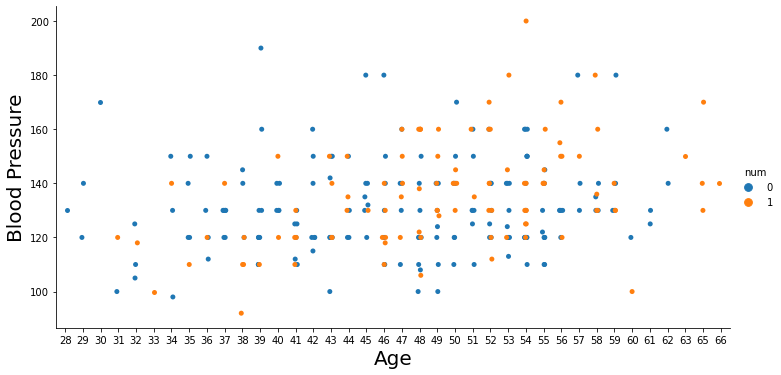

In [29]:
sns.catplot(y="trestbps", x="age", hue="num", data=df, aspect = 2)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Blood Pressure",fontsize=20)
plt.show()

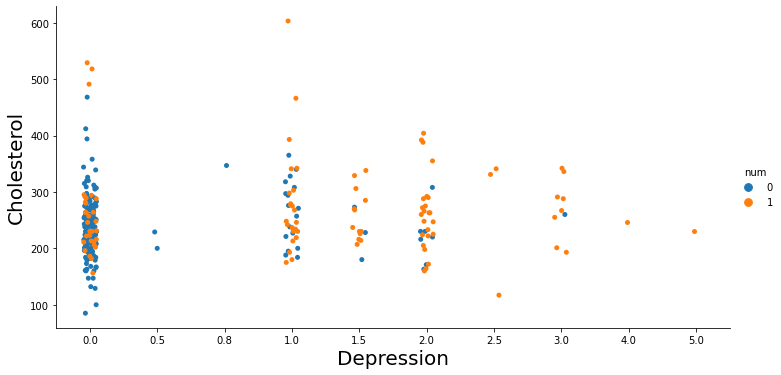

In [30]:
sns.catplot(y="chol", x="oldpeak", hue="num", data=df, aspect = 2)
plt.xlabel("Depression",fontsize=20)
plt.ylabel("Cholesterol",fontsize=20)
plt.show()

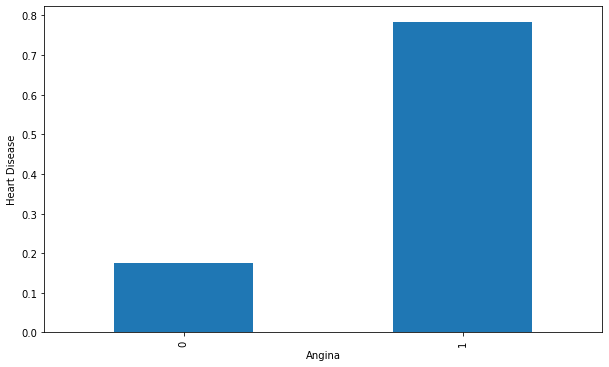

In [31]:
df_cardiographic = df.groupby('exang', axis=0).mean('num')

df_cardiographic['num'].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Angina') 
plt.ylabel('Heart Disease') 
plt.show()

In [32]:
age_num = pd.DataFrame(df, columns=['age','num'])

In [33]:
grouped_age_num = age_num.groupby('age', axis=0).mean('num')

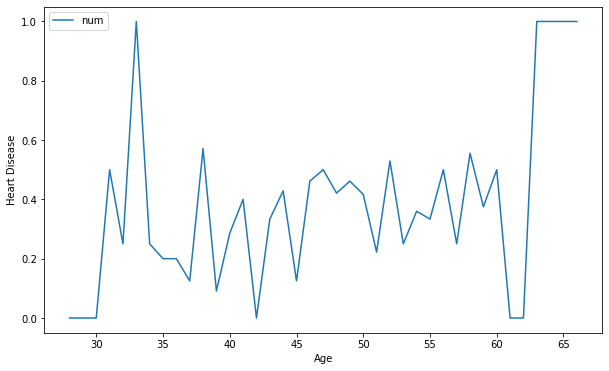

In [34]:
grouped_age_num.plot(kind='line', figsize=(10, 6))
plt.ylabel('Heart Disease')
plt.xlabel('Age')
plt.show()

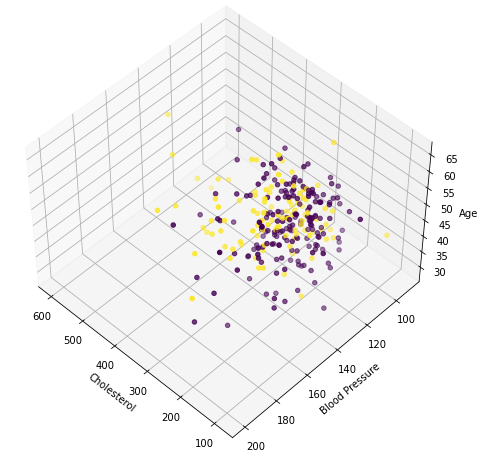

In [35]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Cholesterol')
ax.set_ylabel('Blood Pressure')
ax.set_zlabel('Age')

ax.scatter(df['chol'], df['trestbps'], df['age'], c= df["num"].astype(np.float64))

<h3>Create dummy variables to categorical columns</h3>

In [36]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,230,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0


In [37]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
num           int64
dtype: object

In [38]:
df = pd.get_dummies(df)

In [39]:
df.astype('float64')

,age,trestbps,chol,thalach,oldpeak,num,sex_0,sex_1,cp_1,cp_2,cp_3,cp_4,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1
0,28.0,130.0,132.0,185.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,29.0,120.0,243.0,160.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,29.0,140.0,230.0,170.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,30.0,170.0,237.0,170.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,31.0,100.0,219.0,150.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,52.0,160.0,331.0,94.0,2.5,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
286,54.0,130.0,294.0,100.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
287,56.0,155.0,342.0,150.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
288,58.0,180.0,393.0,110.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [40]:
df.shape

(289, 19)

<h3>Standartize data</h3>

In [41]:
from sklearn import preprocessing

In [42]:
y = df['num'].to_numpy()

In [43]:
X = df.drop(['num'], axis=1)

In [44]:
transform = preprocessing.StandardScaler()

In [45]:
X = transform.fit(X).transform(X)
X[0:5]

array([[-2.55044418, -0.15556787, -1.78401207,  1.98244347, -0.64995321,
        -0.61868822,  0.61868822, -0.19891794,  1.34380997, -0.46841145,
        -0.86079257,  0.27267094, -0.27267094, -2.01746758, -0.46291005,
         6.86779926,  0.66167284, -0.66167284],
       [-2.42203331, -0.72323344, -0.08928249,  0.91235351, -0.64995321,
        -0.61868822,  0.61868822, -0.19891794,  1.34380997, -0.46841145,
        -0.86079257,  0.27267094, -0.27267094,  0.49567091, -0.46291005,
        -0.14560705,  0.66167284, -0.66167284],
       [-2.42203331,  0.41209771, -0.28776433,  1.3403895 , -0.64995321,
        -0.61868822,  0.61868822, -0.19891794,  1.34380997, -0.46841145,
        -0.86079257,  0.27267094, -0.27267094,  0.49567091, -0.46291005,
        -0.14560705,  0.66167284, -0.66167284],
       [-2.29362245,  2.11509444, -0.18088949,  1.3403895 , -0.64995321,
         1.61632299, -1.61632299,  5.02719875, -0.74415283, -0.46841145,
        -0.86079257,  0.27267094, -0.27267094, -2.017

<h2>2. Modeling and Evaluation</h2>

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [47]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [48]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [49]:
y_test.shape

(58,)

<b>Logistic Regression</b>

In [50]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, y_train)
best_lr=logreg_cv.best_estimator_
best_lr

LogisticRegression(C=0.01)

In [51]:
print("Tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)

Tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


In [52]:
print('Accuracy: ', best_lr.score(X_test, y_test))

Accuracy:  0.8620689655172413


In [53]:
yhat=logreg_cv.predict(X_test)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.77      0.67      0.71        15

    accuracy                           0.86        58
   macro avg       0.83      0.80      0.81        58
weighted avg       0.86      0.86      0.86        58



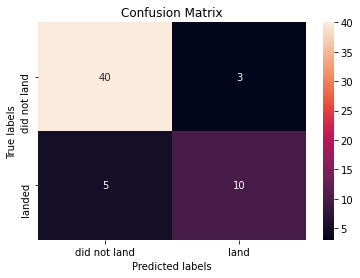

In [54]:
plot_confusion_matrix(y_test,yhat)

<b>Support Vector Machine</b>

In [55]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [56]:
svm_cv = GridSearchCV(svm, parameters,cv=10)
svm_cv.fit(X_train, y_train)
best_svm=svm_cv.best_estimator_
best_svm

SVC(C=1000.0, gamma=0.001)

In [57]:
print("Tuned hyperparameters :(best parameters) ",svm_cv.best_params_)

Tuned hyperparameters :(best parameters)  {'C': 1000.0, 'gamma': 0.001, 'kernel': 'rbf'}


In [58]:
print('Accuracy: ', best_svm.score(X_test, y_test))

Accuracy:  0.8448275862068966


In [59]:
yhat=svm_cv.predict(X_test)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        43
           1       0.75      0.60      0.67        15

    accuracy                           0.84        58
   macro avg       0.81      0.77      0.78        58
weighted avg       0.84      0.84      0.84        58



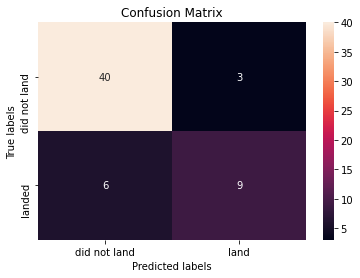

In [60]:
plot_confusion_matrix(y_test,yhat)

<b>Decision Tree</b>

In [61]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [62]:
tree_cv = GridSearchCV(tree, parameters,cv=10)
tree_cv.fit(X_train, y_train)
best_tree=tree_cv.best_estimator_
best_tree

DecisionTreeClassifier(criterion='entropy', max_depth=18, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=10,
                       splitter='random')

In [63]:
print("Tuned hyperparameters :(best parameters) ",tree_cv.best_params_)

Tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}


In [64]:
print('Accuracy: ', best_tree.score(X_test, y_test))

Accuracy:  0.8275862068965517


In [65]:
yhat = tree_cv.predict(X_test)
print(classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.85      0.93      0.89        43
           1       0.73      0.53      0.62        15

    accuracy                           0.83        58
   macro avg       0.79      0.73      0.75        58
weighted avg       0.82      0.83      0.82        58



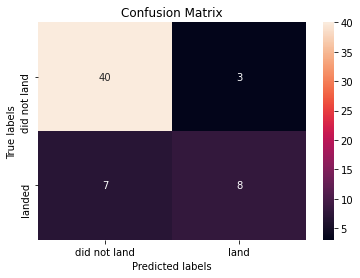

In [66]:
plot_confusion_matrix(y_test,yhat)

In [67]:
from sklearn import tree

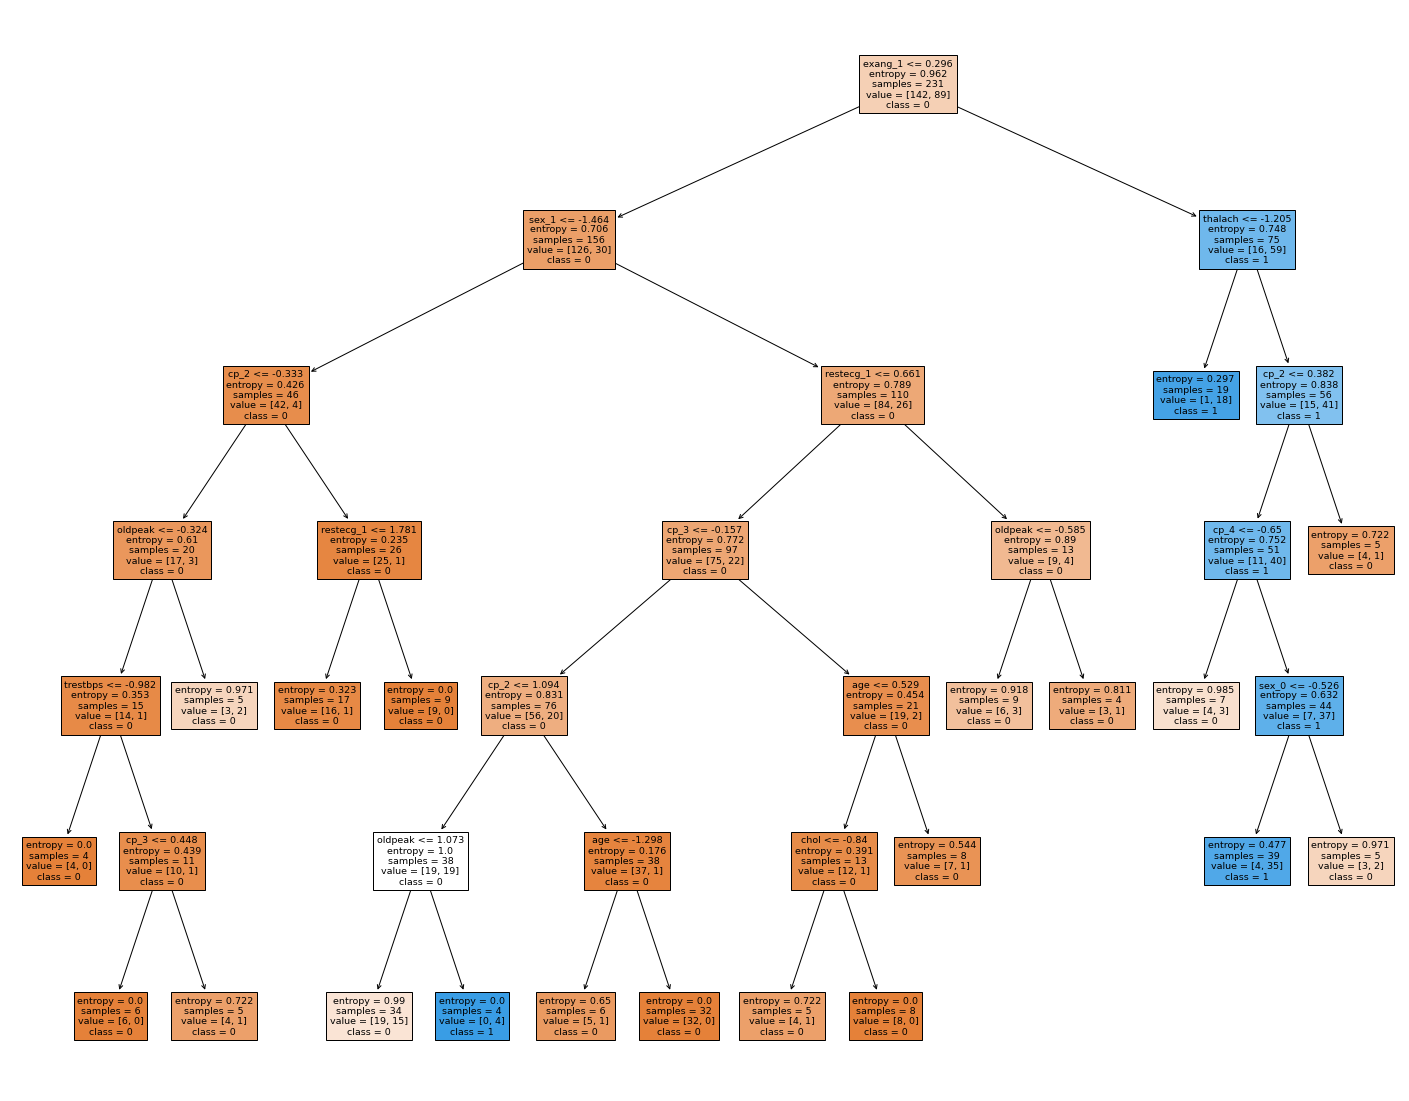

In [68]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_tree, 
                   feature_names=df.columns.drop('num').tolist(),  
                   class_names=['0','1'],
                   filled=True)

<b>k Nearest Neighbors</b>

In [69]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [70]:
knn_cv = GridSearchCV(KNN, parameters,cv=10)
knn_cv.fit(X_train, y_train)
best_knn=knn_cv.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=8)

In [71]:
print("Tuned hyperparameters :(best parameters) ",knn_cv.best_params_)

Tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 8, 'p': 2}


In [72]:
print('Accuracy: ', best_knn.score(X_test, y_test))

Accuracy:  0.8620689655172413


In [73]:
yhat = knn_cv.predict(X_test)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.77      0.67      0.71        15

    accuracy                           0.86        58
   macro avg       0.83      0.80      0.81        58
weighted avg       0.86      0.86      0.86        58



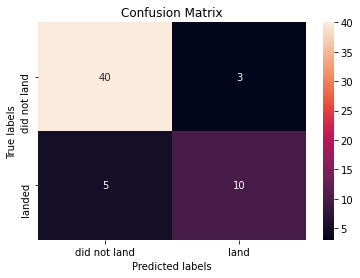

In [74]:
plot_confusion_matrix(y_test,yhat)

<b>Random Forest</b>

In [75]:
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

rfc_cv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
rfc_cv.fit(X_train, y_train)
best_rfc=rfc_cv.best_estimator_
best_rfc

RandomForestClassifier(n_estimators=200, n_jobs=-1, oob_score=True)

In [76]:
print("Tuned hyperparameters :(best parameters) ",rfc_cv.best_params_)

Tuned hyperparameters :(best parameters)  {'max_features': 'auto', 'n_estimators': 200}


In [77]:
print('Accuracy: ', best_rfc.score(X_test, y_test))

Accuracy:  0.8448275862068966


In [78]:
yhat = rfc_cv.predict(X_test)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        43
           1       0.71      0.67      0.69        15

    accuracy                           0.84        58
   macro avg       0.80      0.79      0.79        58
weighted avg       0.84      0.84      0.84        58



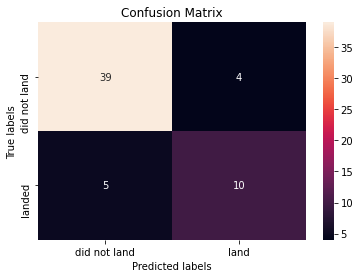

In [79]:
plot_confusion_matrix(y_test,yhat)

<b>Naive Bayes</b>

In [80]:
from sklearn.naive_bayes import BernoulliNB

In [81]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
         }

bernoulli_nb =  BernoulliNB()

bernoulli_nb_cv = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
bernoulli_nb_cv.fit(X_train,y_train)
best_bernoulli_nb=bernoulli_nb_cv.best_estimator_
best_bernoulli_nb

Fitting 5 folds for each of 5 candidates, totalling 25 fits


BernoulliNB(alpha=10.0)

In [82]:
print("Tuned hyperparameters :(best parameters) ",bernoulli_nb_cv.best_params_)

Tuned hyperparameters :(best parameters)  {'alpha': 10.0}


In [83]:
print('Accuracy: ', best_bernoulli_nb.score(X_test, y_test))

Accuracy:  0.8620689655172413


In [84]:
yhat = bernoulli_nb_cv.predict(X_test)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.77      0.67      0.71        15

    accuracy                           0.86        58
   macro avg       0.83      0.80      0.81        58
weighted avg       0.86      0.86      0.86        58



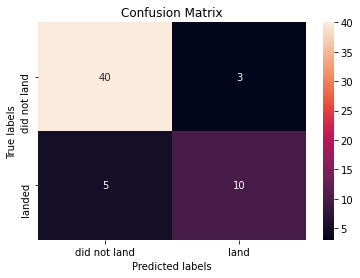

In [85]:
plot_confusion_matrix(y_test,yhat)

<b>Neural Networks</b>

In [86]:
parameters = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}

nn = MLPClassifier()

nn_cv = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)
nn_cv.fit(X_train, y_train)
best_nn = nn_cv.best_estimator_
best_nn

MLPClassifier(alpha=0.1, hidden_layer_sizes=12, max_iter=1000, random_state=5,
              solver='lbfgs')

In [87]:
print("Tuned hyperparameters :(best parameters) ",nn_cv.best_params_)

Tuned hyperparameters :(best parameters)  {'alpha': 0.1, 'hidden_layer_sizes': 12, 'max_iter': 1000, 'random_state': 5, 'solver': 'lbfgs'}


In [88]:
print('Accuracy: ', best_nn.score(X_test, y_test))

Accuracy:  0.8103448275862069


In [89]:
yhat = nn_cv.predict(X_test)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        43
           1       0.64      0.60      0.62        15

    accuracy                           0.81        58
   macro avg       0.75      0.74      0.75        58
weighted avg       0.81      0.81      0.81        58



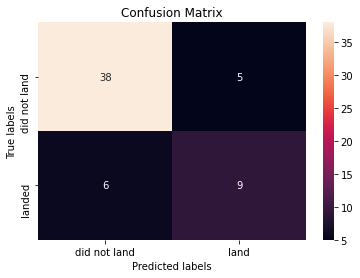

In [90]:
plot_confusion_matrix(y_test,yhat)

<b>The Best Classifier</b>

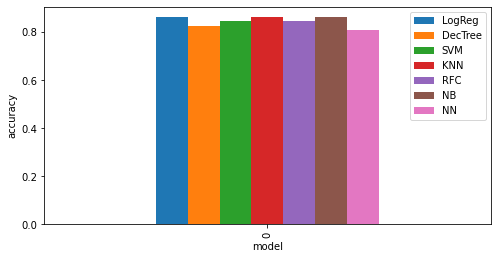

In [91]:
final_accuracy_list = [best_lr.score(X_test, y_test), best_tree.score(X_test, y_test), best_svm.score(X_test, y_test), best_knn.score(X_test, y_test), best_rfc.score(X_test, y_test), best_bernoulli_nb.score(X_test, y_test), best_nn.score(X_test, y_test)]
final_accuracy_df = pd.DataFrame([final_accuracy_list], columns = ['LogReg', 'DecTree', 'SVM', 'KNN', 'RFC', 'NB', 'NN'])

final_accuracy_df.plot(kind='bar', figsize=(8, 4))
plt.xlabel('model') 
plt.ylabel('accuracy') 
plt.show()

In [92]:
classifiers = ['LogReg', 'DecTree', 'SVM', 'KNN', 'RFC', 'NB', 'NN']
accuracies = [str(round(best_lr.score(X_test, y_test),2)), round(best_tree.score(X_test, y_test),2), round(best_svm.score(X_test, y_test),2), round(best_knn.score(X_test, y_test),2), round(best_rfc.score(X_test, y_test),2), round(best_bernoulli_nb.score(X_test, y_test),2), round(best_nn.score(X_test, y_test),2)]

In [93]:
acc = pd.DataFrame(list(zip(classifiers, accuracies)), columns = ['Classifier', 'Accuracy'])

In [94]:
acc['Accuracy'] = acc['Accuracy'].astype('float64')

In [95]:
acc.sort_values(['Accuracy'], ascending=False)

,Classifier,Accuracy
0,LogReg,0.86
3,KNN,0.86
5,NB,0.86
2,SVM,0.84
4,RFC,0.84
1,DecTree,0.83
6,NN,0.81
